
> This is a simplified version of `./01_nn_xy_2_grey.ipynb`

## Assignment 1 - AI for Media - Crysern Smith

- __Extend the model in this notebook into one which maps (X,Y) -> (R,G,B).__
- __Add at least 2 more layers to the network.__
- __Experiment with alternative activation functions and optimizers.__
- __In a paragraph or so, describe how the image we have created differs from a normal image.__

Image used is from the [from SciKit Image here](https://scikit-image.org/docs/dev/api/skimage.data.html) library.

In [1]:
#https://scikit-image.org/docs/stable/api/skimage.data.html
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt

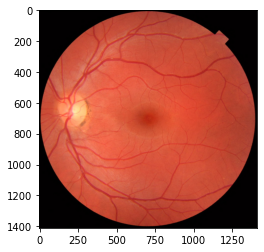

In [2]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/01-1_intro_to_tensorflow/tasks/01_building_n-d_arrays_ANSWERS.ipynb
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/01_nn_xy_2_grey.ipynb
img = skimage.data.retina()
smaller_img = resize(img, (64, 64)) # Resize it just to make things quicker
plt.imshow(img, cmap='gray')

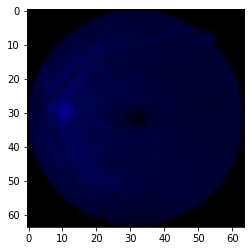

In [3]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/01-1_intro_to_tensorflow/tasks/01_building_n-d_arrays_ANSWERS.ipynb
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/01_nn_xy_2_grey.ipynb
#only Blue color 3 colour channels
a= smaller_img*(0,0,1)
plt.imshow(a)

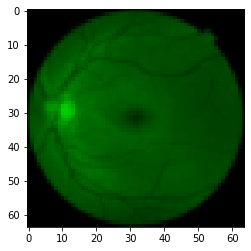

In [4]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/01-1_intro_to_tensorflow/tasks/01_building_n-d_arrays_ANSWERS.ipynb
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/01_nn_xy_2_grey.ipynb
#only green color
a= smaller_img*(0, 1,0)
plt.imshow(a)

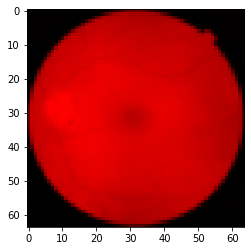

In [5]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/01-1_intro_to_tensorflow/tasks/01_building_n-d_arrays_ANSWERS.ipynb
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/01_nn_xy_2_grey.ipynb
#only red color
a= smaller_img*(1, 0,0)
plt.imshow(a)

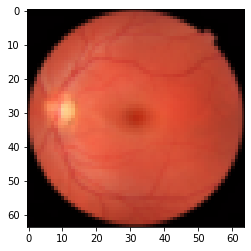

In [6]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/01-1_intro_to_tensorflow/tasks/01_building_n-d_arrays_ANSWERS.ipynb
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/01_nn_xy_2_grey.ipynb
#Full RGB color
a= smaller_img*(1, 1,1)
plt.imshow(a)

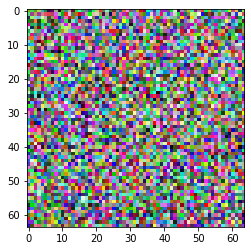

In [7]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/01-1_intro_to_tensorflow/tasks/01_building_n-d_arrays_ANSWERS.ipynb
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/01-1_intro_to_tensorflow/tasks/01_building_n-d_arrays_ANSWERS.ipynb
#random noise
random_image2= np.random.random([64,64,3])
plt.imshow(random_image2)

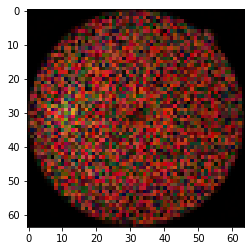

In [8]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/01-1_intro_to_tensorflow/tasks/01_building_n-d_arrays_ANSWERS.ipynb
#Image with random noise
a= smaller_img*(np.random.random([64,64,3]))
plt.imshow(a)

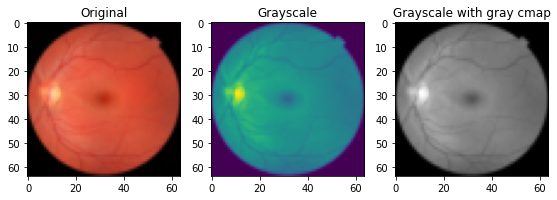

In [32]:
#https://scikit-image.org/docs/stable/api/skimage.data.html
#https://datacarpentry.org/image-processing/03-skimage-images/
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.retina()
grayscale = rgb2gray(original)
Original = resize(original, (64, 64))
Grayscale = resize(grayscale, (64, 64))
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(Original)
ax[0].set_title("Original")
ax[1].imshow(Grayscale)
ax[1].set_title("Grayscale")
ax[2].imshow(Grayscale,cmap=plt.cm.gray)
ax[2].set_title("Grayscale with gray cmap")

fig.tight_layout()
plt.show()


In [10]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
def get_mgrid(sidelen):
    '''Generates a flattened grid of (x,y,...) coordinates in a range of -1 to 1.'''
    width = tf.linspace(-1, 1, sidelen)
    height = tf.linspace(-1, 1, sidelen)
    mgrid = tf.stack(tf.meshgrid(width, height), axis=-1)
    mgrid = tf.reshape(mgrid, [-1, 2])
    return mgrid

In [37]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
#changed to grayscale kept running into ValueError: Data cardinality is ambiguous
image_side_length = smaller_img.shape[0]
X = get_mgrid(image_side_length)      # Inputs
y = tf.reshape(Grayscale, [-1,1])  # Outpus

In [38]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
# Reset back to original fucntions
# Our model!
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='mse', optimizer='sgd')

In [39]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
model.fit(X, y, epochs=100, batch_size=1)

Epoch 1/100
4096/4096 [==============================] - 10s 2ms/step - loss: 0.0274
Epoch 2/100
4096/4096 [==============================] - 8s 2ms/step - loss: 0.0216
Epoch 3/100
4096/4096 [==============================] - 6s 2ms/step - loss: 0.0185
Epoch 4/100
4096/4096 [==============================] - 5s 1ms/step - loss: 0.0161
Epoch 5/100
4096/4096 [==============================] - 5s 1ms/step - loss: 0.0143
Epoch 6/100
4096/4096 [==============================] - 5s 1ms/step - loss: 0.0129
Epoch 7/100
4096/4096 [==============================] - 5s 1ms/step - loss: 0.0117
Epoch 8/100
4096/4096 [==============================] - 5s 1ms/step - loss: 0.0106
Epoch 9/100
4096/4096 [==============================] - 5s 1ms/step - loss: 0.0098
Epoch 10/100
4096/4096 [==============================] - 5s 1ms/step - loss: 0.0091
Epoch 11/100
4096/4096 [==============================] - 5s 1ms/step - loss: 0.0085
Epoch 12/100
4096/4096 [==============================] - 5s 1ms/step - l

In [40]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
# Our traning data is stored in 'X', so lets pass that
# into our trained model and see what it produces.
prediction = model.predict(X)

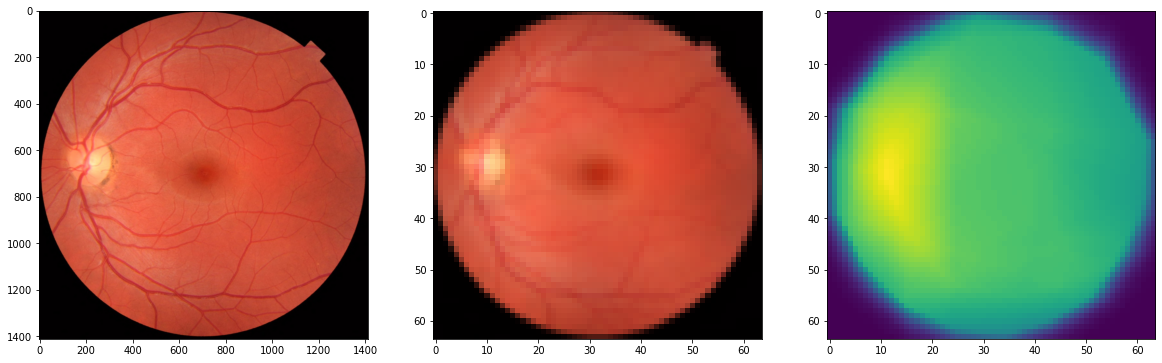

In [47]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (64, 64))
# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img, cmap='gray')
plt.show()

As you can see from the above the default settings provided beter results.
When placed on other optimizers and activation functions the result lacks the definition and accuracy as before.

•	Experiment with alternative activation functions and optimizers.

Below are the alternative functions and the results trained on 50 and 100 epochs.

Further Experimentation with alternative activation functions and optimizers.

# 4 Dense Layers

Activation - Tahn

Optimizer  - Adam

In [60]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
# Reset back to original fucntions
# Our model!
model = Sequential([
    Dense(16, input_dim=2, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='tanh')
])
model.compile(loss='mse', optimizer='adam')

In [64]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
image_side_length = smaller_img.shape[0]
X = get_mgrid(image_side_length)      # Inputs
y = tf.reshape(Grayscale, [-1,1])  # Outpus

In [67]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
model.fit(X, y, epochs=200, batch_size=1)
prediction = model.predict(X)


Epoch 1/200
4096/4096 [==============================] - 11s 3ms/step - loss: 0.0018
Epoch 2/200
4096/4096 [==============================] - 7s 2ms/step - loss: 0.0018
Epoch 3/200
4096/4096 [==============================] - 7s 2ms/step - loss: 0.0020
Epoch 4/200
4096/4096 [==============================] - 7s 2ms/step - loss: 0.0019
Epoch 5/200
4096/4096 [==============================] - 7s 2ms/step - loss: 0.0017
Epoch 6/200
4096/4096 [==============================] - 7s 2ms/step - loss: 0.0017
Epoch 7/200
4096/4096 [==============================] - 7s 2ms/step - loss: 0.0018
Epoch 8/200
4096/4096 [==============================] - 7s 2ms/step - loss: 0.0017
Epoch 9/200
4096/4096 [==============================] - 7s 2ms/step - loss: 0.0019
Epoch 10/200
4096/4096 [==============================] - 7s 2ms/step - loss: 0.0017
Epoch 11/200
4096/4096 [==============================] - 7s 2ms/step - loss: 0.0018
Epoch 12/200
4096/4096 [==============================] - 7s 2ms/step - l

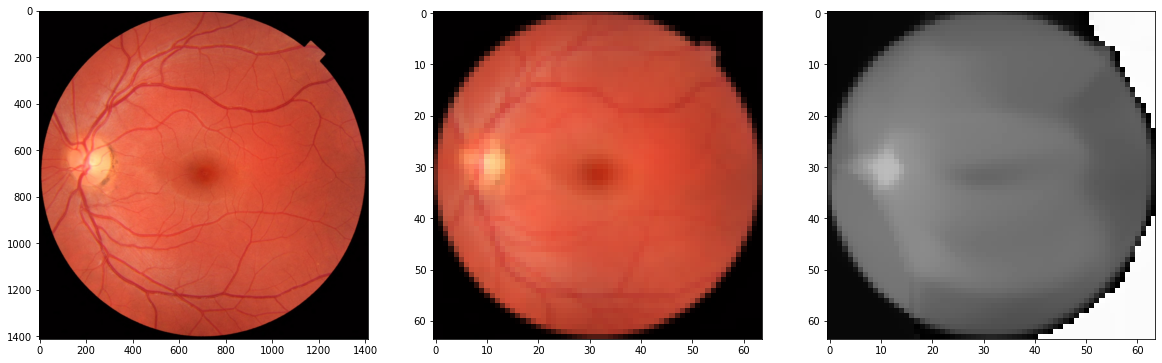

In [70]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (64, 64))
# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img, cmap='gray')
plt.show()

We see a significant difference using completely different epochs and all new activation layers. It seems to do well with the silhouette of any given image, and with faces and outlined shapes, the results would be pretty good.

# 7 Dense Layers

Activation - Relu and Sigmoid

Optimizer  - SGD

In [89]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
# Reset back to original fucntions
# Our model!
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='sigmoid'),
    Dense(32, activation='relu'),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='mse', optimizer='Adam')

In [90]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
image_side_length = smaller_img.shape[0]
X = get_mgrid(image_side_length)      # Inputs
y = tf.reshape(Grayscale, [-1,1])  # Outpus, [-1,1])  # Outpus

In [91]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
model.fit(X, y, epochs=500, batch_size=10)
prediction = model.predict(X)

Epoch 1/500
410/410 [==============================] - 1s 2ms/step - loss: 0.0337
Epoch 2/500
410/410 [==============================] - 1s 2ms/step - loss: 0.0148
Epoch 3/500
410/410 [==============================] - 1s 2ms/step - loss: 0.0065
Epoch 4/500
410/410 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 5/500
410/410 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 6/500
410/410 [==============================] - 1s 2ms/step - loss: 0.0046
Epoch 7/500
410/410 [==============================] - 1s 2ms/step - loss: 0.0043
Epoch 8/500
410/410 [==============================] - 1s 2ms/step - loss: 0.0045
Epoch 9/500
410/410 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 10/500
410/410 [==============================] - 1s 2ms/step - loss: 0.0037
Epoch 11/500
410/410 [==============================] - 1s 2ms/step - loss: 0.0035
Epoch 12/500
410/410 [==============================] - 1s 2ms/step - loss: 0.0040
Epoch 13/500


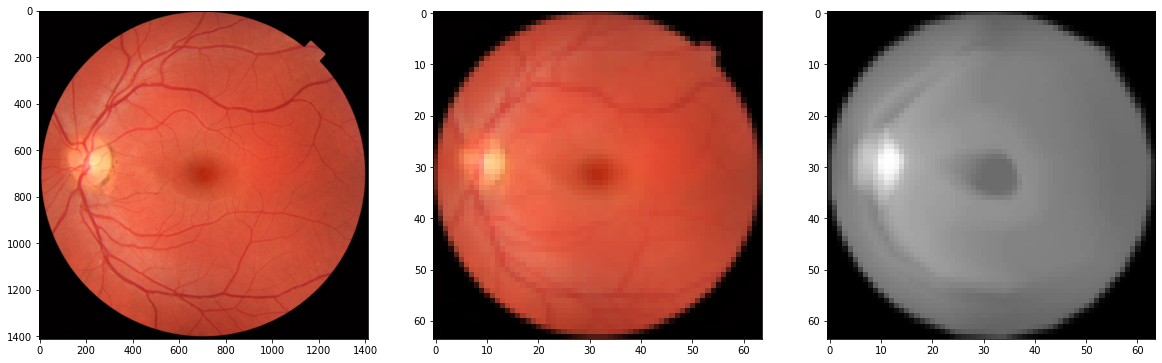

In [92]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/02-1_neural_networks/02_nn_xy_2_colour_TASK.ipynb
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (64, 64))
# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img, cmap='gray')
plt.show()

Reflections:
Adam is the best optimizer if one wants to train the neural network in less time and more efficiently than Adam is the optimizer.
For sparse data, use the optimizers with a dynamic learning rate.
Min-batch gradient descent is the best option if we want to use a gradient descent algorithm.

Referencing: https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

Below are results when SGD optimizer was used vs Adam.
SGD: 200 Epochs

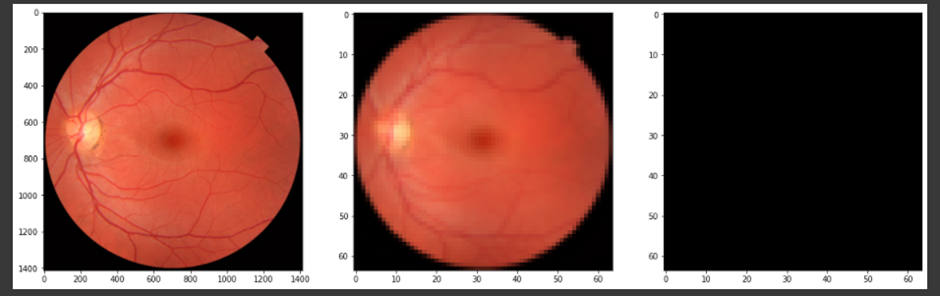


SGD: 500 Epochs

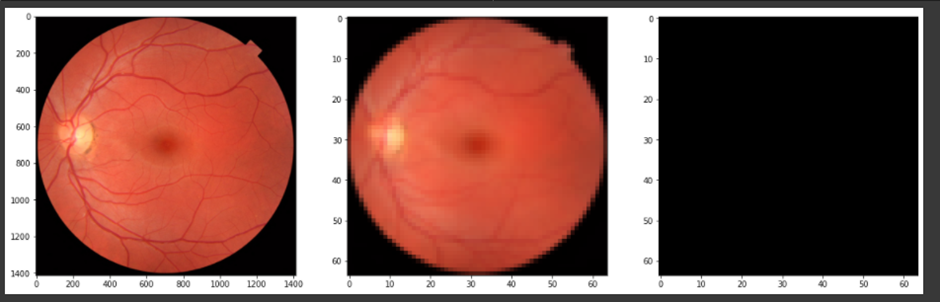


Adam: 500 Epochs

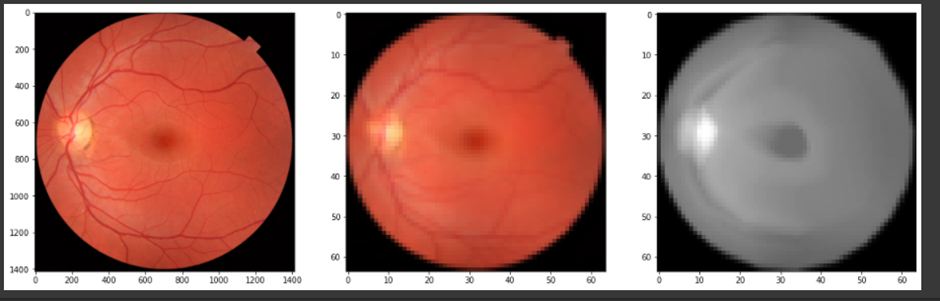


Note: all above were trained on the same activation functions and epochs.


The outcome of the lesson above was to create a continuous function where the pixel value is not discrete.

The image we created differs from a normal one because it comprises many interconnected processing nodes, neurons, that can learn to recognize patterns of input data. 
An advantage of this method could be very effective at tasks such as image recognition or classification.